U_target:  [[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]
Optimization terminated successfully.
         Current function value: 1.895784
         Iterations: 9
         Function evaluations: 65
         Gradient evaluations: 13
Optimal parameters found: [ 1.038  1.038 -0.275  0.756]
Cost function at optimum: 1.8957843311614213
Printing U(t) at optimized time:

U at t=0.7564668735483594:
[[ 0.206-0.979j  0.   +0.j     0.   +0.j     0.   +0.j   ]
 [ 0.   +0.j     0.895-0.189j  0.083+0.395j  0.   +0.j   ]
 [ 0.   +0.j     0.083+0.395j  0.895-0.189j  0.   +0.j   ]
 [-0.   +0.j    -0.   +0.j    -0.   +0.j    -0.206+0.979j]]


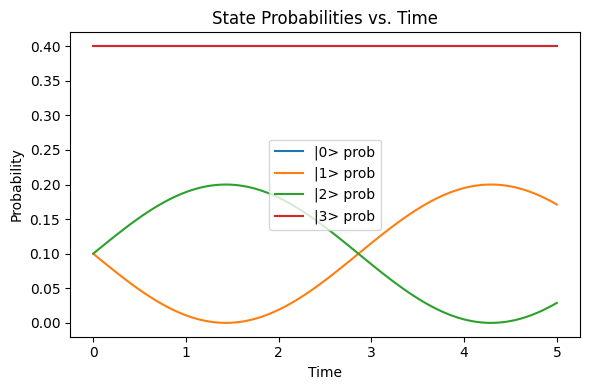

In [6]:
import numpy as np
from scipy.linalg import expm
from scipy.optimize import minimize
import matplotlib.pyplot as plt



# Define cost function
def cost_function(params, U_target):
    # params might be [H1, H2, J, T]
    H1, H2, J, T = params
    H = hamiltonian(H1, H2, J)
    U_guess = expm(-1j * H * T)
    diff = U_guess - U_target
    # Norm
    cost_val = np.linalg.norm(diff, 'fro')
    return cost_val

# Provide some target 4x4 matrix (unitary) to replicate

def get_parameters(U_target):
      # For instance, or a CNOT or anything
    print("U_target: ", U_target)

    # Initial guess
    params0 = [1.0, 0.5, 0.2, 1.0]

    res = minimize(cost_function, params0, args=(U_target,),
                method='BFGS', options={'disp':True})

    print("Optimal parameters found:", res.x)
    print("Cost function at optimum:", res.fun)
    return res.x


# Example: 2-qubit Hamiltonian (4x4)
def hamiltonian(H1, H2, J):
    a = np.array([
        [1, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, -1]
    ], dtype=complex)

    b = np.array([
        [0, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, -1, 0],
        [0, 0, 0, 0]
    ], dtype=complex)

    c = np.array([
        [1,  0,  0,  0],
        [0, -1,  2,  0],
        [0,  2, -1,  0],
        [0,  0,  0,  1]
    ], dtype=complex)

    H_plus  = H1 + H2
    H_minus = H1 - H2
    # Combine them
    H = (H_plus * a) + (H_minus * b) + (J * c)
    return H

def evolve_state(H, initial_state, times):
    """Returns a list of states evolved at each time in 'times'."""
    evolved_states = []
    for t in times:
        U_t = expm(-1j * H * t)
        psi_t = U_t @ initial_state
        evolved_states.append(psi_t)
    return evolved_states

def main():

    # Choose matrix you want for U
    U_target = np.array([
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, -1]
    ], dtype=complex)
    # Optimizes params H1, H2, J, and t to construct U_target
    params = get_parameters(U_target)
    # params = [0.00000372718, -0.00000099869525, 1.08563015, 0.723447637]
    H1, H2, J = params[0], params[1], params[2]
    t_final = 5  # We'll go up to t=5 seconds for illustration

    # Build Hamiltonian
    H = hamiltonian(H1, H2, J)

    # Initial state (two-qubit system = 4D)
    # Example state
    #initial_state = np.array([1, 4, 2, 3], dtype=complex)
    initial_state = np.array([1, 0.5, 0.5j, 1], dtype=complex)
    # Normalize
    norm = np.linalg.norm(initial_state)
    if norm != 0:
        initial_state /= norm

    # --- Print U(t) at each integer second ---
    np.set_printoptions(linewidth=200, precision=3, suppress=True)

    print("Printing U(t) at optimized time:")

    U_s = expm(-1j * H * params[3])
    print(f"\nU at t={params[3]}:\n{U_s}")

    # --- Also sample a finer time grid for plotting the state evolution ---
    num_points = 100
    times = np.linspace(0, t_final, num_points)

    # Evolve the state over the fine time grid
    evolved_states = evolve_state(H, initial_state, times)
    evolved_states = np.array(evolved_states)  # shape = (num_points, 4)

    # Compute probabilities
    probs = np.abs(evolved_states)**2

    # Plot probability vs time
    plt.figure(figsize=(6,4))
    for i in range(4):
        plt.plot(times, probs[:, i], label=f"|{i}> prob")
    plt.title("State Probabilities vs. Time")
    plt.xlabel("Time")
    plt.ylabel("Probability")
    plt.legend()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

<IPython.core.display.Latex object>

Eq(H, Matrix([
[H1 + H2 + J,           0,            0,            0],
[          0, H1 - H2 - J,          2*J,            0],
[          0,         2*J, -H1 + H2 - J,            0],
[          0,           0,            0, -H1 - H2 + J]]))

<IPython.core.display.Latex object>

Eq(U_{target}, Matrix([
[1, 0, 0,  0],
[0, 1, 0,  0],
[0, 0, 1,  0],
[0, 0, 0, -1]]))

Optimization terminated successfully.
         Current function value: 1.895784
         Iterations: 9
         Function evaluations: 65
         Gradient evaluations: 13


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Eq(H_{optimized}, Matrix([
[1.8,      0,      0,     0],
[  0,  0.275, -0.549,     0],
[  0, -0.549,  0.275,     0],
[  0,      0,      0, -2.35]]))

<IPython.core.display.Latex object>

Eq(|\psi_0\rangle, Matrix([
[  sqrt(30)/30],
[2*sqrt(30)/15],
[  sqrt(30)/15],
[  sqrt(30)/10]]))

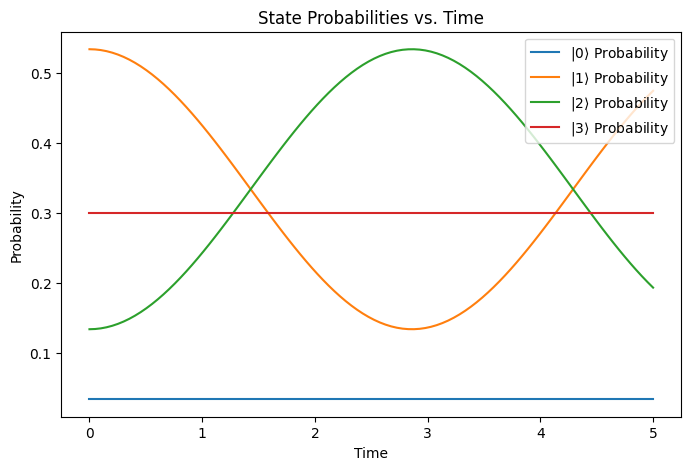

In [13]:
import numpy as np
import sympy as sp
from scipy.linalg import expm
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from IPython.display import display, Latex

# Define symbolic variables
H1_sym, H2_sym, J_sym, T_sym = sp.symbols('H1 H2 J T')

# Define base matrices symbolically
a = sp.Matrix([
    [1, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, -1]
])

b = sp.Matrix([
    [0, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, -1, 0],
    [0, 0, 0, 0]
])

c = sp.Matrix([
    [1,  0,  0,  0],
    [0, -1,  2,  0],
    [0,  2, -1,  0],
    [0,  0,  0,  1]
])

# Construct symbolic Hamiltonian
H_plus = H1_sym + H2_sym
H_minus = H1_sym - H2_sym
H_sym = H_plus * a + H_minus * b + J_sym * c

# Lambdify Hamiltonian for numerical evaluation
H_num = sp.lambdify((H1_sym, H2_sym, J_sym), H_sym, 'numpy')

def cost_function(params, U_target):
    H1, H2, J, T = params
    H = H_num(H1, H2, J).astype(complex)
    U_guess = expm(-1j * H * T)
    diff = U_guess - U_target
    return np.linalg.norm(diff, 'fro')

def get_parameters(U_target):
    params0 = [1.0, 0.5, 0.2, 1.0]
    res = minimize(cost_function, params0, args=(U_target,),
                   method='BFGS', options={'disp': True})
    return res.x

def evolve_state(H, initial_state, times):
    evolved_states = []
    for t in times:
        U_t = expm(-1j * H * t)
        psi_t = U_t @ initial_state
        evolved_states.append(psi_t)
    return evolved_states

def main():
    # Define target unitary
    U_target_np = np.array([
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, -1]
    ], dtype=complex)
    
    # Display symbolic Hamiltonian
    display(Latex(r"## Symbolic Hamiltonian ##"))
    display(sp.Eq(sp.Symbol('H'), H_sym, evaluate=False))
    
    # Display target unitary (fixed applyfunc error)
    display(Latex(r"\n## Target Unitary Matrix ##"))
    U_target_sym = sp.Matrix(U_target_np).applyfunc(lambda x: sp.nsimplify(x, tolerance=1e-6))
    display(sp.Eq(sp.Symbol('U_{target}'), U_target_sym, evaluate=False))
    
    # Optimize parameters
    params = get_parameters(U_target_np)
    H1_opt, H2_opt, J_opt, T_opt = params
    
    # Display optimized parameters (fixed KaTeX error)
    display(Latex(r"\n## Optimized Parameters ##"))
    display(Latex(rf"$H_1 = {H1_opt:.3f}$"))
    display(Latex(rf"$H_2 = {H2_opt:.3f}$"))
    display(Latex(rf"$J = {J_opt:.3f}$"))
    display(Latex(rf"$T = {T_opt:.3f} \approx {T_opt:.3f}$"))
    
    # Display optimized Hamiltonian (fixed numerical display)
    H_opt_sym = H_sym.subs({
        H1_sym: H1_opt,
        H2_sym: H2_opt,
        J_sym: J_opt
    }).evalf(3)
    display(Latex(r"\n## Optimized Hamiltonian ##"))
    display(sp.Eq(sp.Symbol('H_{optimized}'), H_opt_sym, evaluate=False))
    
    # Numerical Hamiltonian for simulation
    H_np = H_num(H1_opt, H2_opt, J_opt).astype(complex)
    
    # Initial state setup and display
    initial_state = np.array([1, 4, 2, 3], dtype=complex)
    initial_state /= np.linalg.norm(initial_state)
    display(Latex(r"\n## Initial State ##"))
    display(sp.Eq(sp.Symbol('|\psi_0\\rangle'), sp.Matrix(initial_state).applyfunc(lambda x: sp.nsimplify(x, tolerance=1e-6)), evaluate=False))
    
    # Time evolution and plotting
    times = np.linspace(0, 5, 100)
    evolved_states = evolve_state(H_np, initial_state, times)
    probs = np.abs(np.array(evolved_states))**2
    
    plt.figure(figsize=(8, 5))
    for i in range(4):
        plt.plot(times, probs[:, i], label=f"$|{i}\\rangle$ Probability")
    plt.title("State Probabilities vs. Time")
    plt.xlabel("Time")
    plt.ylabel("Probability")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()